<a href="https://colab.research.google.com/github/Yuyu817/CNN-hw/blob/main/CNN_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

匯入套件

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import torch.nn as nn
from tensorflow.keras import layers


檢查是否使用 GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

進一步知道用了什麼 GPU

In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


讀入eminst 數據集

(The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19  and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset )


In [ ]:
!pip install emnist
import emnist
from emnist import extract_training_samples, extract_test_samples

In [ ]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

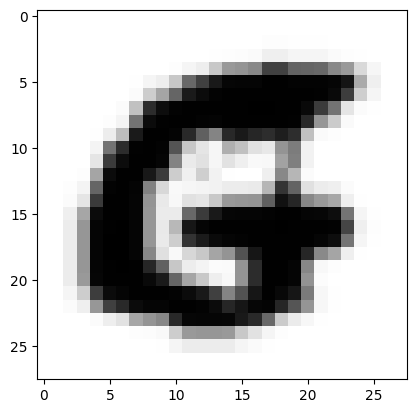

In [ ]:
plt.imshow(x_train[1], cmap='Greys')

資料整理

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train - 1, 37)
y_test = to_categorical(y_test - 1, 37)

打造CNN

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2,random_state = 42)

In [ ]:
model =Sequential()

In [ ]:
model.add(Conv2D(32, 3, padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, 3, padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten(input_shape=(28, 28,1)))

In [ ]:
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(37,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

訓練

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
3120/3120 [==============================] - 183s 58ms/step - loss: 0.3986 - accuracy: 0.8720 - val_loss: 0.2305 - val_accuracy: 0.9236
Epoch 2/10
3120/3120 [==============================] - 158s 51ms/step - loss: 0.2027 - accuracy: 0.9324 - val_loss: 0.2102 - val_accuracy: 0.9294
Epoch 3/10
3120/3120 [==============================] - 158s 51ms/step - loss: 0.1691 - accuracy: 0.9427 - val_loss: 0.2061 - val_accuracy: 0.9331
Epoch 4/10
3120/3120 [==============================] - 162s 52ms/step - loss: 0.1515 - accuracy: 0.9477 - val_loss: 0.2050 - val_accuracy: 0.9312
Epoch 5/10
3120/3120 [==============================] - 160s 51ms/step - loss: 0.1440 - accuracy: 0.9510 - val_loss: 0.2230 - val_accuracy: 0.9268
Epoch 6/10
3120/3120 [==============================] - 160s 51ms/step - loss: 0.1408 - accuracy: 0.9514 - val_loss: 0.2602 - val_accuracy: 0.9255
Epoch 7/10
3120/3120 [==============================] - 159s 51ms/step - loss: 0.1454 - accuracy: 0.9520 - val_loss: 0

評估CNN效果

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

780/780 [==============================] - 10s 13ms/step


In [ ]:
loss, acc = model.evaluate(x_test, y_test)

780/780 [==============================] - 10s 13ms/step - loss: 0.4115 - accuracy: 0.9289


In [ ]:
print(f'測試資料的正確率為 {acc*100:.2f}%')

測試資料的正確率為 92.89%


預測

In [ ]:
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z',26: '0', 27: '1', 28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9',
}

def my_predict(n):
    predicted_class = y_predict[n]
    predicted_class_label = class_mapping[predicted_class]
    print('CNN 預測是', predicted_class_label)
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap='Greys')


In [ ]:
from ipywidgets import interact_manual

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

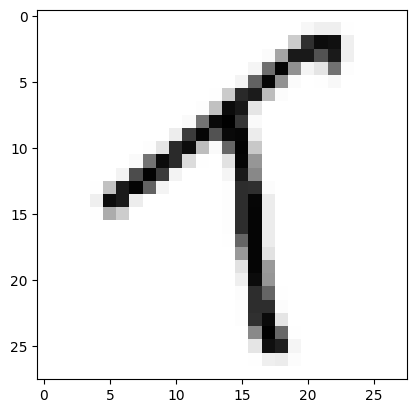

In [ ]:
interact_manual(my_predict, n=(0, 9999));

儲存CNN

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_cnn_model')